## Moringa School Data Science Class Phase One Project Submission

Details:
* Student name: Kihara Kariuki
* Student pace: Part time
* Scheduled project review date/time: Data Science Class: 03 - Phase One Project
* Instructor name: Moringa School

## Project Overview 

### Objectives

The goals of this project is to identify the viable movie options that Microsoft can adopt in their endeavour to develop a movie studio. We will look at multiple data sets from different sources and come up with justifiable evidence, based on the data, on which option Microsoft should adopt.

### The Data

The available data has been sourced from the sites below:

* Box Office Mojo

* IMDB

* Rotten Tomatoes

* TheMovieDB

* The Numbers


### Analysis

### Data Importation

In [2]:
#Importing the requisite modules for data loading and visualisation

import pandas as pd
import numpy as np
import sqlite3
from matplotlib import pyplot as plt

%matplotlib inline

In [242]:
#Loading the IMDB dataset from its database file and identifying the available tables
con = sqlite3.connect('zippedData\\im.db\im.db')

cur = con.cursor()

cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""").fetchall()


[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

### Loading data from the various tables in the im.db

#### Movie Basics Table

In [254]:
# Reading the movie basics table using the read_sql method from pandas

movie_basics = pd.read_sql("""SELECT * 

FROM movie_basics;""", con)

movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
movie_basics.groupby(['start_year'])['start_year'].count()

start_year
2010    11849
2011    12900
2012    13787
2013    14709
2014    15589
2015    16243
2016    17272
2017    17504
2018    16849
2019     8379
2020      937
2021       83
2022       32
2023        5
2024        2
2025        1
2026        1
2027        1
2115        1
Name: start_year, dtype: int64

In [6]:
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [7]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### Directors Table

In [253]:
# Reading the directors table using the read_sql method from pandas

directors = pd.read_sql("""SELECT * 

FROM directors;""", con)

directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


#### Known For Table

In [251]:
# Reading the known for table using the read_sql method from pandas

known_for = pd.read_sql("""SELECT * 

FROM known_for;""", con)

known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


#### Movie AKAs Table

In [10]:
# Reading the movie akas table using the read_sql method from pandas

movie_akas = pd.read_sql("""SELECT * 

FROM movie_akas;""", con)

movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


#### Movie Ratings Table

In [11]:
# Reading the movie ratings table using the read_sql method from pandas

movie_ratings = pd.read_sql("""SELECT * 

FROM movie_ratings;""", con)

movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


#### Persons Table

In [12]:
# Reading the persons table using the read_sql method from pandas

persons = pd.read_sql("""SELECT * 

FROM persons;""", con)

persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


### Principals Table

In [250]:
# Reading the principals table using the read_sql method from pandas

principals = pd.read_sql("""SELECT * 

FROM principals;""", con)

principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


#### Writers Table

In [249]:
# Reading the writers table using the read_sql method from pandas

writers = pd.read_sql("""SELECT * 

FROM writers;""", con)

writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


## Loading data from the other .csv and .tsv files

#### BOM Movies CSV

In [248]:
# Loading the BOM movies csv

bom_movies = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### RT Movies Info CSV

In [247]:
# Loading the RT movie info csv

rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

rt_movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


#### RT Movies Reviews CSV

In [246]:
# Loading the RT movie Reviews csv

rt_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding= 'unicode_escape')

rt_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


#### TMDB Movies CSV

In [245]:
# Loading the TMDB movies csv

tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz').rename(columns={'Unnamed: 0': '#'}).set_index('#')

tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
#,,,,,,,,,
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1


#### TN Movie Budgets CSV

In [244]:
# Loading the TN movies budget csv
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


C:\Users\kuta\AppData\Local\Temp\ipykernel_6112\1343043481.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genres_ratings.dropna(axis=0,subset=['genres'], inplace=True)
C:\Users\kuta\AppData\Local\Temp\ipykernel_6112\1343043481.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_genres_ratings.drop_duplicates(inplace=True)


,averagerating
genres,
"Comedy,Documentary,Fantasy",9.4
"History,Sport",9.2
"Music,Mystery",9.0
Game-Show,9.0
"Drama,Short",8.8
...,...
"Crime,Music",2.4
"History,Sci-Fi,Thriller",2.3
"Adventure,Crime,Romance",2.3


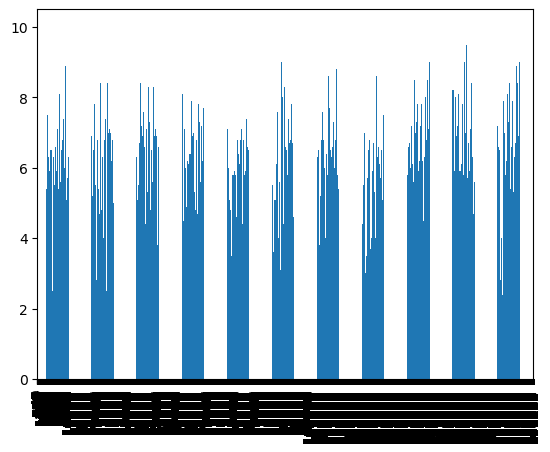

In [255]:
# Identifying the most rated movie genres

movie_basics_and_directors = pd.merge(movie_basics, directors, on='movie_id').rename(columns={'person_id': 'director_id'})

movie_basics_and_directors_with_ratings = pd.merge(movie_basics_and_directors, movie_ratings, on='movie_id')

movie_genres_ratings = movie_basics_and_directors_with_ratings[['primary_title','genres','averagerating']]

movie_genres_ratings.dropna(axis=0,subset=['genres'], inplace=True)

movie_genres_ratings.drop_duplicates(inplace=True)

movie_genres_ratings.sort_values(by=['averagerating'],ascending=False)

genre_rating = movie_genres_ratings[['genres', 'averagerating']]

genre_rating_grouped = genre_rating.groupby(['genres']).mean().sort_values(by=['averagerating'], ascending=False)

genre_rating_two = genre_rating.groupby(['genres'])['averagerating'].mean()

genre_rating

genre_rating_grouped

In [ ]:
genre_rating_grouped.plot.bar(figsize=(15,6), title = 'Average Rating of Different Genre of Movies')

In [256]:
genre_rating_grouped.info
genre_rating_grouped.index
# genre_rating_grouped.head(10).plot.scatter(x=index, y='averagerating')

Index(['Comedy,Documentary,Fantasy', 'History,Sport', 'Music,Mystery',
       'Game-Show', 'Drama,Short', 'Comedy,Drama,Reality-TV',
       'Drama,Fantasy,War', 'Documentary,News,Sport',
       'Documentary,News,Reality-TV', 'Action,Adventure,Musical',
       ...
       'Crime,Horror,Musical', 'Animation,Comedy,Musical',
       'Documentary,Drama,Western', 'Animation,Horror,Romance', 'Horror,War',
       'Crime,Music', 'History,Sci-Fi,Thriller', 'Adventure,Crime,Romance',
       'Adult,Horror', 'Comedy,Musical,Sport'],
      dtype='object', name='genres', length=921)

,averagerating
genres,
"Comedy,Documentary,Fantasy",9.4
"History,Sport",9.2
"Music,Mystery",9.0
Game-Show,9.0
"Drama,Short",8.8
...,...
"Action,Animation,History",7.5
"Biography,Music,Romance",7.5
"Adventure,Biography,Crime",7.5


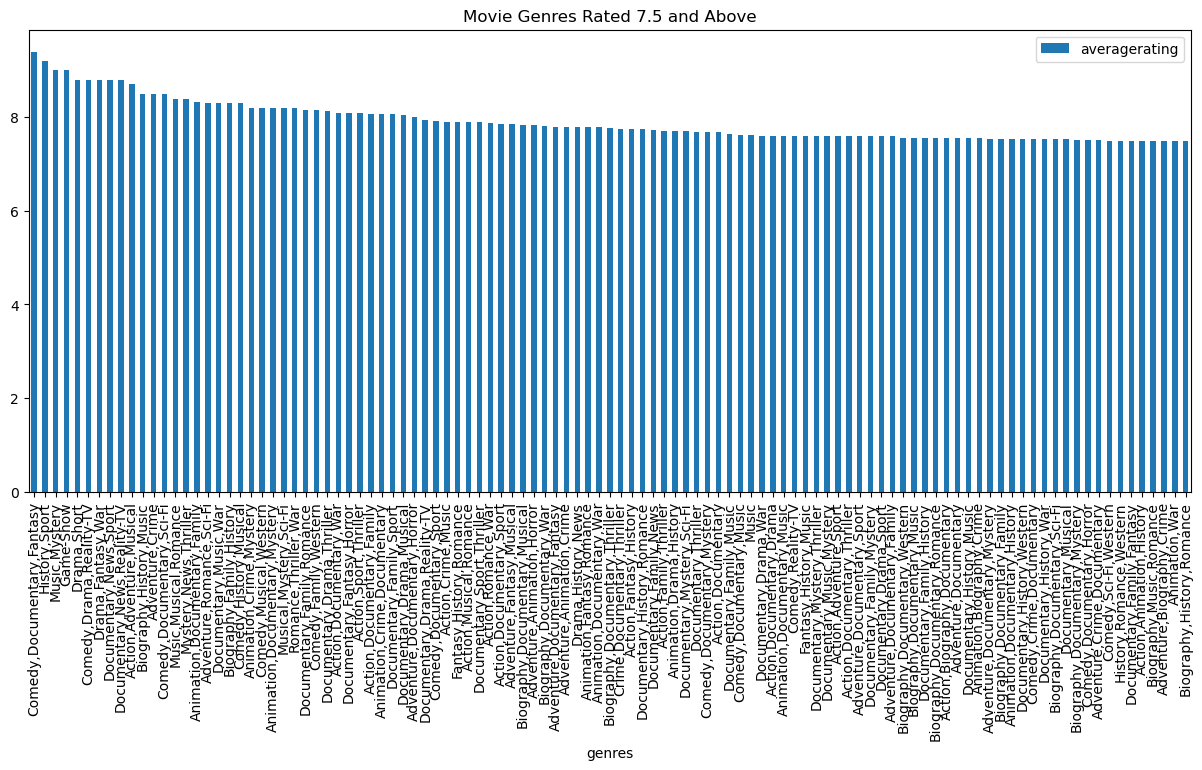

In [38]:
genre_rating_grouped_top7 = genre_rating_grouped[genre_rating_grouped['averagerating']>=7.5]

genre_rating_grouped_top7.plot.bar(figsize=(15,6), title='Movie Genres Rated 7.5 and Above')

genre_rating_grouped_top7

In [257]:
# Picking movies with a rating of 7.5 and above

genre_rating_grouped[genre_rating_grouped['averagerating']>=7.5]

,averagerating
genres,
"Comedy,Documentary,Fantasy",9.4
"History,Sport",9.2
"Music,Mystery",9.0
Game-Show,9.0
"Drama,Short",8.8
...,...
"Action,Animation,History",7.5
"Biography,Music,Romance",7.5
"Adventure,Biography,Crime",7.5


In [30]:
genre_rating_two.index

Index(['Action', 'Action,Adult,Comedy', 'Action,Adventure',
       'Action,Adventure,Animation', 'Action,Adventure,Biography',
       'Action,Adventure,Comedy', 'Action,Adventure,Crime',
       'Action,Adventure,Documentary', 'Action,Adventure,Drama',
       'Action,Adventure,Family',
       ...
       'Sci-Fi,Thriller', 'Sci-Fi,War', 'Sci-Fi,Western', 'Sport',
       'Sport,Thriller', 'Thriller', 'Thriller,War', 'Thriller,Western', 'War',
       'Western'],
      dtype='object', name='genres', length=921)

In [31]:
movie_basics_and_directors_with_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181389 entries, 0 to 181388
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         181389 non-null  object 
 1   primary_title    181389 non-null  object 
 2   original_title   181389 non-null  object 
 3   start_year       181389 non-null  int64  
 4   runtime_minutes  163586 non-null  float64
 5   genres           180049 non-null  object 
 6   director_id      181389 non-null  object 
 7   averagerating    181389 non-null  float64
 8   numvotes         181389 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 13.8+ MB


In [32]:
movie_basics_and_directors_with_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,director_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,7.0,77
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,7.2,43
...,...,...,...,...,...,...,...,...,...
181384,tt9914642,Albatross,Albatross,2017,NaN,Documentary,nm5300859,8.5,8
181385,tt9914642,Albatross,Albatross,2017,NaN,Documentary,nm5300859,8.5,8
181386,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5
181387,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,nm1716653,6.6,5


In [258]:
# Identifying relationships between the number of votes a movie gets and its average rating

rating_votes = movie_len_rating[['primary_title', 'movie_id','averagerating','numvotes']].dropna(axis=0, subset=['movie_id']).drop_duplicates()

rating_votes

,primary_title,movie_id,averagerating,numvotes
0,Sunghursh,tt0063540,7.0,77
4,One Day Before the Rainy Season,tt0066787,7.2,43
5,The Other Side of the Wind,tt0069049,6.9,4517
7,Sabse Bada Sukh,tt0069204,6.1,13
8,The Wandering Soap Opera,tt0100275,6.5,119
...,...,...,...,...
181380,Diabolik sono io,tt9913084,6.2,6
181382,Sokagin Çocuklari,tt9914286,8.7,136
181384,Albatross,tt9914642,8.5,8
181386,La vida sense la Sara Amat,tt9914942,6.6,5


In [259]:
# Identifying relationships between movie length and its average rating

movie_len_rating = movie_basics_and_directors_with_ratings[['primary_title','movie_id','runtime_minutes','averagerating', 'numvotes']]

movie_len_rating

,primary_title,movie_id,runtime_minutes,averagerating,numvotes
0,Sunghursh,tt0063540,175.0,7.0,77
1,Sunghursh,tt0063540,175.0,7.0,77
2,Sunghursh,tt0063540,175.0,7.0,77
3,Sunghursh,tt0063540,175.0,7.0,77
4,One Day Before the Rainy Season,tt0066787,114.0,7.2,43
...,...,...,...,...,...
181384,Albatross,tt9914642,NaN,8.5,8
181385,Albatross,tt9914642,NaN,8.5,8
181386,La vida sense la Sara Amat,tt9914942,NaN,6.6,5
181387,La vida sense la Sara Amat,tt9914942,NaN,6.6,5


<AxesSubplot:title={'center':'Correlation Between Number of Votes and Average Rating'}, xlabel='averagerating', ylabel='numvotes'>

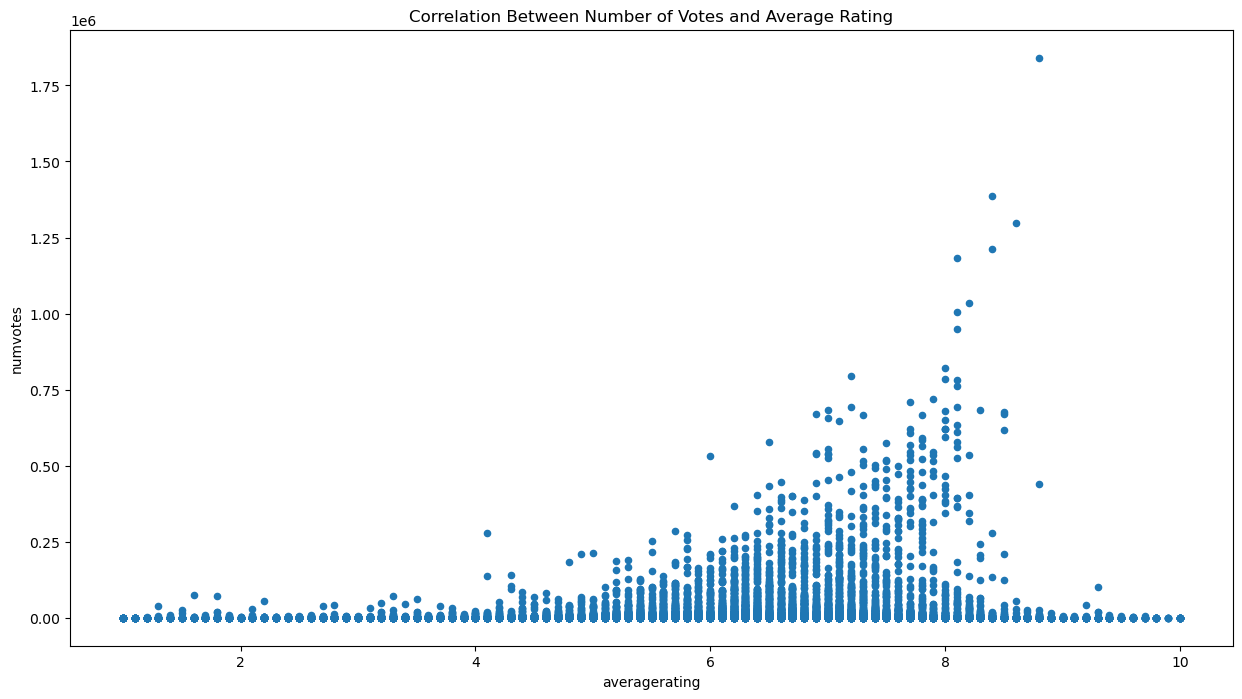

In [34]:
rating_votes.plot.scatter(x='averagerating', y='numvotes', figsize=(15,8), title = 'Correlation Between Number of Votes and Average Rating')

In [ ]:
movie_len_rating.plot.scatter(x='runtime_minutes', y='averageratings', figsize=(15,8), title = 'Correlation Between Length of a Movie and Average Ratings')

In [ ]:
# Combining datasets to identify the category of people involved in various movies

person_movie_rating = pd.merge(known_for, movie_ratings, on='movie_id').drop_duplicates()

person_movie_rating

known_for_movie_rating = pd.merge(person_movie_rating, principals, left_on=['movie_id','person_id'], right_on=['movie_id','person_id'], suffixes=('_person','_job'))

known_for_movie_rating

persons_and_their_movie_ratings = pd.merge(known_for_movie_rating, persons, on='person_id')

persons_and_their_movie_ratings['person_age'] = 2023 - persons_and_their_movie_ratings['birth_year']

persons_and_their_movie_ratings

In [ ]:
# Extracting the list of actors who are still alive with ratings for movies they have been involved with

actors_list = persons_and_their_movie_ratings[(persons_and_their_movie_ratings['category']=='actress') | (persons_and_their_movie_ratings['category']=='actor')]

actors_list

alive_actors = actors_list[actors_list['death_year'].isna()]

alive_actors

movie_actor_rating = alive_actors[['primary_name', 'person_id', 'movie_id', 'averagerating', 'numvotes','person_age', 'primary_profession']]

movie_actor_rating

In [ ]:
# Identifying the list of top movie actors and actresses whom Microsoft would preferbly prioritise in their search for talent based on ratings

movie_actor_rating_grouped = movie_actor_rating.groupby(['primary_name']).mean().sort_values(by=['averagerating', 'numvotes'], ascending=False)

movie_actor_rating_grouped[(movie_actor_rating_grouped['averagerating']>=9) & (movie_actor_rating_grouped['numvotes']>=100)].drop(columns= ['person_age'])


In [ ]:
# Identifying the list of top movie directors whom Microsoft would preferbly prioritise in their search for talent based on ratings

directors_list = persons_and_their_movie_ratings[persons_and_their_movie_ratings['category']=='director']

alive_directors = directors_list[directors_list['death_year'].isna()]

alive_directors

movie_director_rating = alive_directors[['primary_name', 'person_id', 'movie_id', 'averagerating', 'numvotes','person_age', 'primary_profession']]

movie_director_rating

In [101]:
#List of directors of choice

movie_director_rating_grouped = movie_director_rating.groupby(['primary_name']).mean().sort_values(by=['averagerating', 'numvotes'], ascending=False)

movie_director_rating_grouped[(movie_director_rating_grouped['averagerating']>=9) & (movie_director_rating_grouped['numvotes']>=50)].drop(columns= ['person_age'])



,averagerating,numvotes
primary_name,,
Karzan Kardozi,9.6,1339.0
Paul Michael Bloodgood,9.6,78.0
Bharatha Hettiarachchi,9.5,6509.0
Chathra Weeraman,9.5,6509.0
Jean Griesser,9.5,829.0
...,...,...
Kenneth A. Carlson,9.0,75.0
Kireet Khurana,9.0,74.0
Ranko Varlaj,9.0,67.0


In [ ]:
# Combining additional datasets to identify domestic gross revenues for various movie titles and studios

bom_domestic_movies_earnings = bom_movies[['title','studio','domestic_gross','year']].dropna(axis=0, subset=['domestic_gross'])

bom_domestic_movies_title_earnings = pd.merge(movie_basics, bom_domestic_movies_earnings, left_on='primary_title',right_on='title')

bom_domestic_movies_title_earnings

bom_domestic_movies_earnings = bom_movies[['title','studio','domestic_gross','year']].dropna(axis=0, subset=['domestic_gross'])

bom_domestic_movies_title_earnings_two = pd.merge(movie_basics, bom_domestic_movies_earnings, left_on='original_title',right_on='title')

bom_domestic_movies_title_earnings_two

bomc = [bom_domestic_movies_title_earnings, bom_domestic_movies_title_earnings_two]

bom_domestic_movies_title_earnings_combined = pd.concat(bomc).drop_duplicates()

bom_domestic_movies_title_earnings_combined

## Highest Grossing Genres

In [134]:
bom_domestic_movies_title_earnings_combined.groupby(['genres']).mean(['domestic_gross']).drop(columns=['start_year','runtime_minutes','year'], axis=0).sort_values(by=['domestic_gross'], ascending=False)

,domestic_gross
genres,
"Adventure,Drama,Sport",4.007000e+08
"Action,Adventure,Sci-Fi",2.345681e+08
"Adventure,Drama,Sci-Fi",2.082000e+08
"Documentary,Drama,Sport",2.067250e+08
"Fantasy,Romance",2.005215e+08
...,...
"Action,Horror",7.900000e+03
"Documentary,History,Thriller",7.100000e+03
"Drama,War,Western",5.300000e+03


## The Competition

In [130]:
bom_domestic_movies_title_earnings_combined.groupby(['genres']).mean(['domestic_gross']).drop(columns=['start_year','runtime_minutes','year'], axis=0).sort_values(by=['domestic_gross'], ascending=False)bom_domestic_movies_title_earnings_combined.groupby(['studio']).mean(['domestic_gross']).drop(columns=['start_year','runtime_minutes','year'], axis=0).sort_values(by=['domestic_gross'], ascending=False)

,domestic_gross
studio,
BV,1.795121e+08
P/DW,1.682900e+08
WB,8.760775e+07
Uni.,8.557675e+07
MGM,8.300000e+07
...,...
TAFC,4.600000e+03
ALP,2.800000e+03
First,2.000000e+03


In [137]:
bom_domestic_movies_title_earnings_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 2751
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3387 non-null   object 
 1   primary_title    3387 non-null   object 
 2   original_title   3387 non-null   object 
 3   start_year       3387 non-null   int64  
 4   runtime_minutes  3218 non-null   float64
 5   genres           3347 non-null   object 
 6   title            3387 non-null   object 
 7   studio           3386 non-null   object 
 8   domestic_gross   3387 non-null   float64
 9   year             3387 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 291.1+ KB


## Best Foreign Grossing Movie Genres

In [261]:
# Combining additional datasets to identify foreign gross revenues for various movie genres

bom_domestic_movies_title_earnings = pd.merge(movie_basics, bom_domestic_movies_earnings, left_on='primary_title',right_on='title')

bom_foreign_movies_title_earnings = bom_movies[['title','studio','foreign_gross','year']].dropna(axis=0, subset=['foreign_gross'])

bom_foreign_movies_title_earnings_two = pd.merge(movie_basics, bom_foreign_movies_earnings, left_on='original_title',right_on='title')

bomfc = [bom_foreign_movies_title_earnings, bom_foreign_movies_title_earnings_two]

bom_foreign_movies_title_earnings_combined = pd.concat(bomfc).drop_duplicates().dropna(subset=['genres'], axis=0)

bom_foreign_movies_title_earnings_combined.groupby(['genres']).mean(['foreign_gross'])

bom_foreign_movies_title_earnings_combined.drop(columns=['start_year','runtime_minutes','year','title','movie_id','primary_title','original_title','studio'], axis=0).sort_values(by=['foreign_gross'], ascending=False).set_index('genres').convert_dtypes()

,foreign_gross
genres,
"Adventure,Drama,Thriller",99700
"Comedy,Drama",99700
"Drama,Family",99600
"Crime,Drama",9900000
Documentary,9900000
...,...
"Drama,Thriller",1000000
"Documentary,War",100000
"Action,Adventure,Sci-Fi","1,369.5"


## Best Grossing Foreign Movie Studios

In [262]:
# Combining additional datasets to identify foreign gross revenues for various movie studios

bom_domestic_movies_title_earnings = pd.merge(movie_basics, bom_domestic_movies_earnings, left_on='primary_title',right_on='title')

bom_foreign_movies_title_earnings = bom_movies[['title','studio','foreign_gross','year']].dropna(axis=0, subset=['foreign_gross'])

bom_foreign_movies_title_earnings_two = pd.merge(movie_basics, bom_foreign_movies_earnings, left_on='original_title',right_on='title')

bomfc = [bom_foreign_movies_title_earnings, bom_foreign_movies_title_earnings_two]

bom_foreign_movies_title_earnings_combined = pd.concat(bomfc).drop_duplicates().dropna(subset=['genres'], axis=0)

bom_foreign_movies_title_earnings_combined.groupby(['studio']).mean(['foreign_gross'])

foreign_gross = bom_foreign_movies_title_earnings_combined.drop(columns=['title','movie_id','primary_title', 'original_title', 'genres', 'runtime_minutes', 'year', 'start_year'], axis=0)

foreign_gross['foreign_gross'].str.replace(',','').astype(float)

# foreign_gross.set_index('studio').sort_values(by=['foreign_gross'], ascending=False)

foreign_gross.sort_values(by=['foreign_gross'])

,studio,foreign_gross
1617,Uni.,"1,010.0"
8,Uni.,"1,019.4"
1578,BV,"1,369.5"
1727,IFC,100000
1445,STX,1000000
...,...,...
789,RTWC,9900000
1474,FoxS,9900000
812,Scre.,99600
1187,Magn.,99700


In [157]:
bom_foreign_movies_title_earnings_combined.describe()


,year,start_year,runtime_minutes
count,1754.000000,1754.000000,1657.000000
mean,2013.669897,2013.830673,104.982498
std,2.587860,2.679357,26.560073
min,2010.000000,2010.000000,3.000000
25%,2011.000000,2011.000000,93.000000
50%,2014.000000,2014.000000,104.000000
75%,2016.000000,2016.000000,118.000000
max,2018.000000,2019.000000,623.000000


In [158]:
bom_foreign_movies_title_earnings_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 1777
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1754 non-null   object 
 1   studio           1752 non-null   object 
 2   foreign_gross    1754 non-null   object 
 3   year             1754 non-null   int64  
 4   movie_id         1754 non-null   object 
 5   primary_title    1754 non-null   object 
 6   original_title   1754 non-null   object 
 7   start_year       1754 non-null   float64
 8   runtime_minutes  1657 non-null   float64
 9   genres           1754 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 150.7+ KB


In [ ]:
tn_movies_budget